In [1]:
import numpy as np
from forward import run_forward
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

import IMU_inverse as imu


ground = np.array((50.,1.))
Ts = np.array((.5,2.5,4.5))

In [2]:
trajs = [run_forward(0,5,ground) for i in range(10)]
trajs = [(np.concatenate((np.vstack((t[:-1],t[1:])).T.reshape(-1),[t[-1]])),np.vstack((s,s)).T.reshape(-1)[:-1]) for (t,s) in trajs]
th = imu.params(ground,100)
rhos = [imu.solve(th.rho,th.B,th.omega*t) for t in Ts]

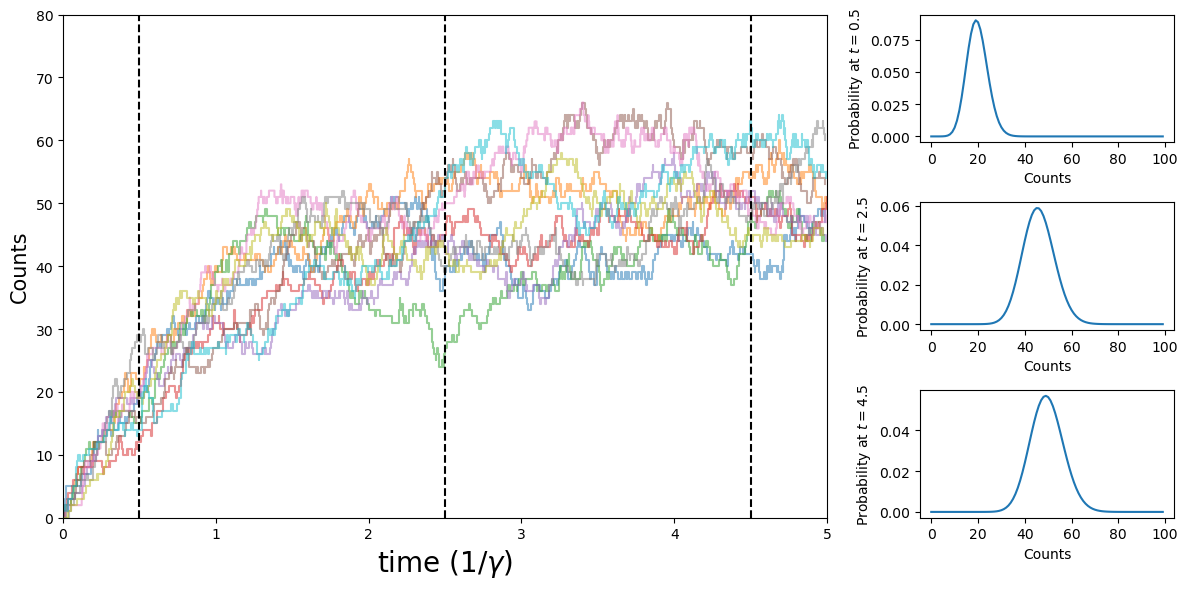

In [3]:
# Set up the GridSpec
fig = plt.figure(figsize=(12, 6))

# Setting the layout. 3 rows and 2 columns. The left plot will span all 3 rows.
gs = gridspec.GridSpec(3, 2, width_ratios=[9, 3])

# The 9x6 plot on the left side
ax0 = plt.subplot(gs[:, 0])  # Spans all rows in the first column
[ax0.plot(t,r,alpha=.5) for (t,r) in trajs]
ax0.set_xlim(0,5)
maximum = 80
ax0.set_ylim(0,maximum)
[ax0.axvline(t,linestyle='dashed',color='k') for t in Ts]
ax0.set_xlabel(r'time ($1/\gamma$)',fontsize=20)
ax0.set_ylabel('Counts',fontsize=15)

# First subplot of 3x6 size on the right side
axs = [plt.subplot(gs[i, 1]) for i in range(3)]
[axi.plot(np.arange(r.size),r) for (axi,r) in zip(axs,rhos)]
[(axi.set_xlabel('Counts'),axi.set_ylabel('Probability at $t={}$'.format(t))) for (axi,t) in zip(axs,Ts)]
#[axi.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f')) for axi in axs]
#[axi.set_xlim(0,50+6*np.sqrt(50)) for axi in axs]


plt.tight_layout()
plt.savefig('fig1.png',dpi=450)
plt.show()